In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Linear Regressions
## 1. Batch Gradient Descent
## 2. Stochastic Gradient Descent
## 3. Normal Equation
## 4. Locally weighted regression

In [ ]:
# Generate sample data
X = 100 * np.random.rand(100, 1) # Features
Y = 40 + 3 * X + 40 * np.random.randn(100, 1) # Target (linear relationship + noise)

# Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Original Data')
plt.title('Synthetic Data for Linear Regression')
plt.xlabel('X (Feature)')
plt.ylabel('Y (Target)')
plt.grid(True)
plt.legend()
plt.show()

print("Generated X (first 5 rows):\n", X[:5])
print("Generated Y (first 5 rows):\n", Y[:5])

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Linear Regression
- $\theta$: parameters
- $\theta_j$ = jth parameters → $ℝ^{n+1}$ when n = # input
- m = # trainning examples
- x = inputs / features
- y = output / target
- $(x, y)$ = training examples
- $(x^{(i)}, y^{(i)} )$ = ith training examples

**Hypothesis Function**:  $h(x) = \theta_0+\theta_1x_1+\theta_2x_2+...$

**Cost Function**: $J(\theta) =\frac12\sum_{i=1}^m(h_\theta(x^i)-y^i)^2$

GOAL : choose Parameters s.t. $h(x) \approx y$ for target datas.

→ minimize Cost Function → gradient descent

## Batch Gradient Descent

(calcutating can be slow with huge dataset)

- start with random $\theta$ → keep changing $\theta$ to reduce $J(\theta)$

- Find partial derivative of $J(\theta)$:   $\frac{\delta}{\delta \theta_j}J(\theta) = (h_\theta(x)-y)⋅ x_j$

- $\theta_j ≔  \theta_j - \alpha (h_\theta(x)-y)⋅x_j$    ($\alpha$ as learning weight)

Repeat until convergence → find local optimal

In [ ]:
def linear_regression_batch(X_train, Y_train, alpha = 0.0001, epoch = 100):
  intercept = np.random.rand() #theta 0
  coefficient = np.random.rand(1,1) #theta 1

  # Fit Model
  for i in range(epoch):
    error = intercept + coefficient * X_train - Y_train
    intercept = intercept - alpha * np.mean(error)
    coefficient = coefficient - alpha * np.mean(error) * X_train
    print(f"Epoch {i+1}: Intercept = {intercept:.2f}, Coefficient = {coefficient[0][0]:.2f}")

  print(f"Intercept (theta_0): {intercept:.2f}")
  print(f"Coefficient (theta_1): {coefficient[0][0]:.2f}")
  return intercept, coefficient

intercept, coefficient =  linear_regression_batch(X_train, Y_train)

## Stochastic gradient descent
update after use one data → memory efficient

Descending makes some noises but eventually goes to local minimum

In [ ]:
def linear_regression_stochastic(X_train, Y_train, alpha = 0.001, epoch = 100):
  alpha = 0.0001
  epoch = 100
  intercept = np.random.rand() #theta 0
  coefficient = np.random.rand() #theta 1

  # Fit Model
  for i in range(epoch):
    for j in range(len(X_train)):
      error = intercept + coefficient * X_train[j].item() - Y_train[j].item()
      intercept = intercept - alpha * error
      coefficient = coefficient - alpha * error * X_train[j].item()
    print(f"Epoch {i+1}: Intercept = {intercept:.2f}, Coefficient = {coefficient:.2f}")

  print(f"Intercept (theta_0): {intercept:.2f}")
  print(f"Coefficient (theta_1): {coefficient:.2f}")
  return intercept, coefficient

intercept, coefficient = linear_regression_stochastic(X_train, Y_train)

##Normal Equation
$\theta = (x^Tx)^{-1}x^Ty$

Derivation:
1. $x\theta = \text{(column vector)}x^{(i)^T}\theta =\text{(column vector)} h(x)$

2. $J(\theta) =\frac12\sum_{i=1}^m(h_\theta(x^i)-y^i)^2 = \frac12\sum_{i=1}^m(x\theta -y)^2$ (Matrix)

3. $\frac12\sum_{i=1}^m(x\theta -y)^2 = \frac12(x\theta - y)^T(x\theta - y)$

4. $\nabla_\theta \frac12(x\theta - y)^T(x\theta - y) = (x^Tx)^{-1}x^Ty$


### +) Linear algebra

- Derivative of Matrix function → partial derivative of each element of matrix

- trace of A → sum of diagonal entries, tr(A)

- $trA = trA^T$

- $trAB = trBA$,         $trABC = trCAB$

- $f(A) = trAB$  → $\nabla _A f(A) = B^T$

- $\nabla_A trAA^TC = CA+C^TA$

- $\sum_{i=1,\ j=i}^{i=n,\ j=m}(a_{ij})^2 = A^TA$

In [ ]:
def linear_regression_normal_equation(X_train, Y_train):
  # Add a bias (intercept) term to X_train
  X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]

  # Normal Equation
  theta_normal = np.linalg.inv(X_b_train.T @ X_b_train) @ X_b_train.T @ Y_train

  # Extract intercept and coefficient
  intercept_normal = theta_normal[0][0]
  coefficient_normal = theta_normal[1][0]

  print(f"Intercept (theta_0) from Normal Equation: {intercept_normal:.2f}")
  print(f"Coefficient (theta_1) from Normal Equation: {coefficient_normal:.2f}")
  return intercept_normal, coefficient_normal

intercept, coefficient = linear_regression_normal_equation(X_train, Y_train)

In [ ]:
#Estimation

def gradient_model_estimation(intercept, coefficient)
  #Make Predictions
  Y_pred = intercept + coefficient * X_test

  #Evaluate model
  mse = mean_squared_error(Y_test, Y_pred)
  r2 = r2_score(Y_test, Y_pred)
  print(f"Mean Squared Error (MSE): {mse:.2f}")
  print(f"R-squared (R2): {r2:.2f}")

#gradient_model_estimation(intercept, coefficient)

+) LinearRegression model from scikit

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, Y_train)     # It actually uses Singular Value Decomposition (SVD)

# The intercept (theta_0)
print(f"Intercept (theta_0): {model.intercept_[0]:.2f}")
# The coefficient (theta_1)
print(f"Coefficient (theta_1): {model.coef_[0][0]:.2f}")

In [ ]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

In [ ]:
# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual Test Data')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('X (Feature)')
plt.ylabel('Y (Target)')
plt.grid(True)
plt.legend()
plt.show()

##Locally Weighted Regression

- Non-parametric learning algorithm
- $J(\theta) = \sum_{i=1}^{m}w^{(i)}(y^{(i)}-\theta^T x^{(i)})^2$
- where $w^i$ is weighting fuction, which returns about 1 if $x^i$ is close to target  $x$ or about 0
- $w^i = \exp(-\frac{{(x^{(i)}-x)}^2}{2\tau^2})$ ($\tau$ = bandwidth)
-  $|x^{(i)} - x|$is small, i.e. can cover a lot of Xs within bandwidth (goes to 1)
-   $|x^{(i)} - x|$is large i.e. can't cover a lot of Xs within bandwidth (goes to 0)  

### Non-parametric learning algorithm

- parametric learning algorithm: Fit fixed set of parameters to data
- Non-parametric learning algorithm: Amount of data/parameters **grows** (linearly) with size of data








In [ ]:
# Generate sample data
function = lambda x: np.sin(x)
X = 10 * np.random.rand(100, 1) # Features
Y =  10 * function(X) + 5 * np.random.randn(100, 1) # Target (linear relationship + noise)

# Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Original Data')
plt.title('Synthetic Data for Linear Regression')
plt.xlabel('X (Feature)')
plt.ylabel('Y (Target)')
plt.grid(True)
plt.legend()
plt.show()

print("Generated X (first 5 rows):\n", X[:5])
print("Generated Y (first 5 rows):\n", Y[:5])

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
def gaussian_kernel(x_i, x, tau):
    return np.exp(-np.sum((x_i - x)**2) / (2 * tau**2))

def locally_weighted_regression(X_train, Y_train, query_point, tau):
    m = X_train.shape[0]
    weights = np.array([gaussian_kernel(X_train[i], query_point, tau) for i in range(m)])

    # Add bias term to X_train for the normal equation
    X_b = np.c_[np.ones((m, 1)), X_train]

    # Create a diagonal weight matrix
    W = np.diag(weights)

    # Calculate theta using the weighted normal equation
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ Y_train

    # Predict for the query point
    prediction = np.array([1, query_point.item()]) @ theta
    return prediction[0]

def predict_lwr(X_train, Y_train, X_test, tau):
    Y_pred = []
    for x_test_point in X_test:
        Y_pred.append(locally_weighted_regression(X_train, Y_train, x_test_point, tau))
    return np.array(Y_pred).reshape(-1, 1)

# Set bandwidth parameter
tau = 0.5

# Make predictions on the test set
Y_pred_lwr = predict_lwr(X_train, Y_train, X_test, tau)

# Sort the test data and predictions for smoother plotting
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
Y_pred_lwr_sorted = Y_pred_lwr[sorted_indices]

# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(X, Y, color='blue', label='Original Data', alpha=0.6)
plt.plot(X_test_sorted, Y_pred_lwr_sorted, color='red', linewidth=3, label=f'LWR Prediction (tau={tau})')
plt.title('Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

#Generalized Linear Model
## 1. Logistic Regression
## 2. Perceptron
### +) Exponential Family, GLM
## 3. Softmax Regression

## Logistic Regression

1. In classification, we need $h(x)$  fuction with domain $[0,1]$ .
2. Sigmoid funtion / logistic fuction $g(x) = \frac{1}{1+e^{-x}}$ ,   $h(x) = g(\theta^Tx)$
3. Probability function of classification
    
    $$
    P(y=1|x;\theta) = h_\theta(x)\ \ P(y=0|x;\theta) = 1 - h_\theta(x)
    $$
    
    → can be compressed to $P(y|x;\theta) = h_\theta(x)^y(1-h_\theta(x))^{1-y}$ (Bernoulli Distribution)
    
4. Likelyhood   $L(\theta) = \prod_{i=1}^{m} h_\theta(x^{(i)})^{y^{(i)}}(1-h_\theta(x^{(i)}))^{1-y^{(i)}}$
5. choose $\theta$  to **maximize** log likelyhood $l(\theta)$
    
    → Batch Gradient **Ascent**
    
    $$
     \theta_j = \theta_j + \alpha\frac{\delta}{\delta\theta_j}l(\theta) = \theta_j + \alpha\sum_{i=1}^m(y^{(i)}-h_\theta(x^{(i)}))x_j^{(i)}
    $$


### +)Probabilistic Interpretation

- Assumption: $\theta^Tx^{(i)}+\varepsilon^{(i)}$, $\varepsilon^{(i)}$ is  **error fuction**, which follows Gaussian Distribution

- This implies $P(y^{(i)}|x^{(i)};\theta) = N(y^{i}|\theta^Tx^{(i)}, \sigma^2)$

- **Probability of y** when **x**, parametrized as **theta**
is equal to **Gaussian distribution** with mean, distribution → given **x and theta**, the **correct output y** can be distributed as **Gaussian Distribution**

Likelyhood function, probability of data:
$L(\theta) = P(\overrightarrow{y}|\ x;\theta) = \prod_{i=1}^{m}N(\theta^Tx^{(i)}, \sigma^2)$

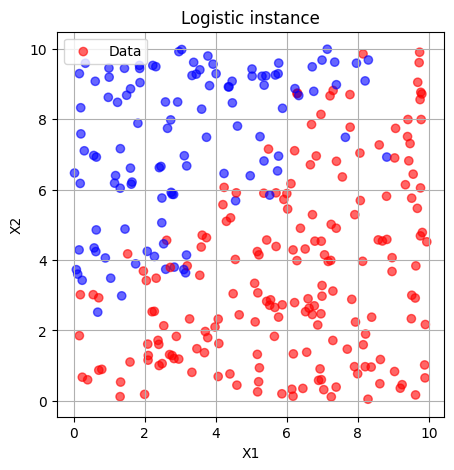

In [ ]:
np.random.seed(0)
N = 300
X = 10 * np.random.rand(N, 2)
Y = (X @ np.array([[-3], [4]])) + 20 * np.random.rand(N, 1) > 20

plt.figure(figsize=(5, 5))
colors = np.where(Y.flatten() == True, 'b', 'r')
plt.scatter(X[:,0], X[:,1], c=colors, label='Data', alpha=0.6)
plt.title('Logistic instance')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_regression(X_train, Y_train, alpha = 0.001, epoch = 100):
    theta = np.random.randn(np.shape(X_train)[1], 1)

    for i in range(epoch):
        theta = theta + alpha * X_train.T @ (Y_train - sigmoid(X_train @ theta))
        #print(f"Epoch {i+1}: theta = {theta}")

    return theta

parameter = logistic_regression(X_train, Y_train)

plot_x1 = np.array([min(X[:,0]), max(X[:,0])])
plot_x2 = plot_x1 * (-parameter[0][0] / parameter[1][0])

plt.figure(figsize=(5, 5))
colors = np.where(Y_test.flatten() == True, 'b', 'r')
plt.scatter(X_test[:,0], X_test[:,1], c = colors, label = 'Data', alpha = 0.6)
plt.plot(plot_x1, plot_x2, color='orange', linewidth=3, label='prediction')
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

## Perceptron
1. perceptron function:    $g(x) = \begin{cases}1 \quad (x\ge 0) \\ 0 \quad (x\lt 0)\end{cases} $
    
2. $h(x) = g(\theta^Tx)$
    
3. Update Rule: $\theta_j = \theta_j + \alpha(y^{(i)}-h_\theta(x^{(i)}))x_j^{(i)}$
    
    - $y^{(i)}-h_\theta(x^{(i)})$ is.. \
        0 → algorithm got it right.      
        1 → wrong when y = 1       
        -1 →  wrong when y = 0
    
    - $\alpha x_j^{(i)}$ to vector addition → tilt classification line towards $x^{(i)}$

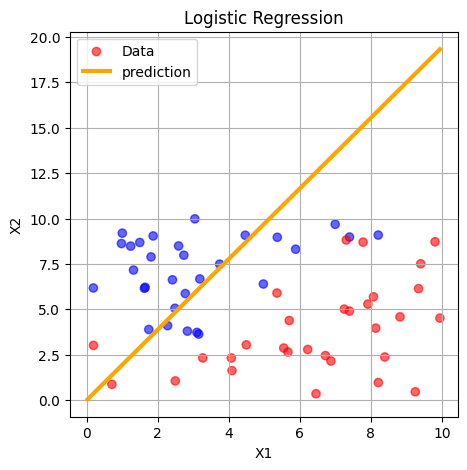

In [ ]:
def perceptron(x):
    return (x >= 0).astype(int)

def perceptron_regression(X_train, Y_train, alpha = 0.001, epoch = 100):
    theta = np.random.randn(np.shape(X_train)[1], 1)
    theta

    for i in range(epoch):
        theta = theta + alpha * X_train.T @ (Y_train - perceptron(X_train @ theta))
        #print(f"Epoch {i+1}: theta = {theta}")

    return theta

parameter = perceptron_regression(X_train, Y_train)

plot_x1 = np.array([min(X[:,0]), max(X[:,0])])
plot_x2 = plot_x1 * (-parameter[0][0] / parameter[1][0])

plt.figure(figsize=(5, 5))
colors = np.where(Y_test.flatten() == True, 'b', 'r')
plt.scatter(X_test[:,0], X_test[:,1], c = colors, label = 'Data', alpha = 0.6)
plt.plot(plot_x1, plot_x2, color='orange', linewidth=3, label='prediction')
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

## Exponential Family

distribution with PDF(probability density Function) form with below.
$$
p(y;\eta) = b(y)exp[\eta^TT(y)-a(\eta)]
$$
- y - data
- $\eta$ - natural parameter → match dimension with T(y)
- $T(y)$ - Sufficicant statistic → eventually goes to y
- $b(y)$ - Base measure
- $a(\eta)$ - log-partition

HOW to choose?
- Real value → Gaussian
- Binary → Bernoulli
- Count →  Poisson
- R^2 →  Gamma/exponential
- Distribution →  Bayesian

Properties
- MLE(Maximum Likelyhood Estimation) wrt $\eta$ → concave
- Mean is partial derivative of log-partition
- Variance is second partial deraivative of log-partition





## GLM (Generalized Linear model)

Can derive Exp.Fam. with model

- Assume $y$ (i.e. $\mu$) follows Exponential Family.
i.e. $P(y|x;\theta)$ ~ Exp.Fam.($\eta$)

- Linear Components: linear combination of predictor variables and coefficients $ \mu  = \theta^Tx$

- Link function (g): function that relates $\mu$ and $\eta$ ($\eta = \theta^Tx$ for Gaussian)


Three Parameters

- Model param $\theta$ → learning
- Natural Param $\eta$ → design choose from $\theta^Tx$
- Canonical Param: Each Exp.Fam.'s parameter that derived by $\eta$  
( e.g. Gaussian : $\mu\sigma^2$, Bernoulli : $\phi$, Poisson : $\lambda$ )

##Softmax Regression (Multiclass Classification)
make linear classification for each classes

Terminology
- $K$ - # classes

- $y = [\{0,1\}^K]$ (e.g. {0,0,1,0} meaning third label.)

- $\theta_c \in ℝ^n$

How to calculate Probability?

1. given x

2. calc $\theta_c^Tx$ for each class\
 $z = [\theta_1^Tx,  \theta_2^Tx, \theta_3^Tx …]$

3. $softmax(z) = [\frac{e^z_1}{\sum e^z}, \frac{e^z_2}{\sum e^z} , \frac{e^z_3}{\sum e^z} … ]$

4. One-hot encoding: use argmax of z

How to learn?

Cost Function: Cross Entropy $J(\theta) = -\sum_yy \log(\hat y)$  ->


$$
J(\theta) = -\frac{1}{m} \sum_{i}\sum_{k} y_{k}^{(i)} \log(\hat{y}_{k}^{(i)})
$$
Partial differentiate wrt theta ->
$$
\nabla_{\theta_k} J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} (\hat y_{k}^{(i)} - {y}_{k}^{(i)})x_i
$$


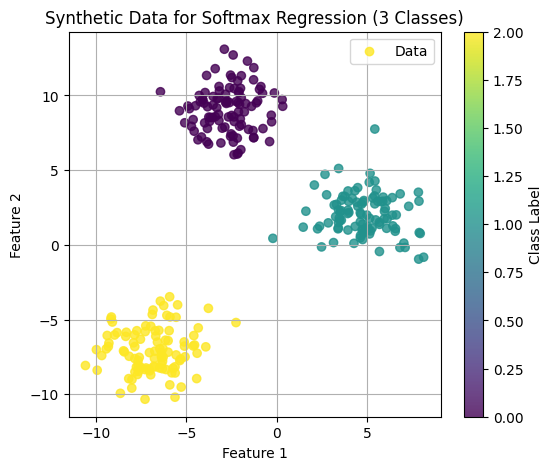

In [2]:
from sklearn.datasets import make_blobs

np.random.seed(0)
N_samples = 300
n_features = 2
n_classes = 3
X, Y = make_blobs(n_samples=N_samples, n_features=n_features, centers=n_classes,
                  cluster_std=1.5, random_state=42)

Y = Y.reshape(-1, 1)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), label='Data', alpha=0.8)
plt.title('Synthetic Data for Softmax Regression (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class Label')
plt.legend()
plt.grid(True)
plt.show()

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Learned Parameters (theta):
[[-0.12401375 -0.25722606  0.05756647]
 [-0.1929108   0.13271841 -0.13870431]
 [ 0.23894776  0.10465519 -0.11613551]]


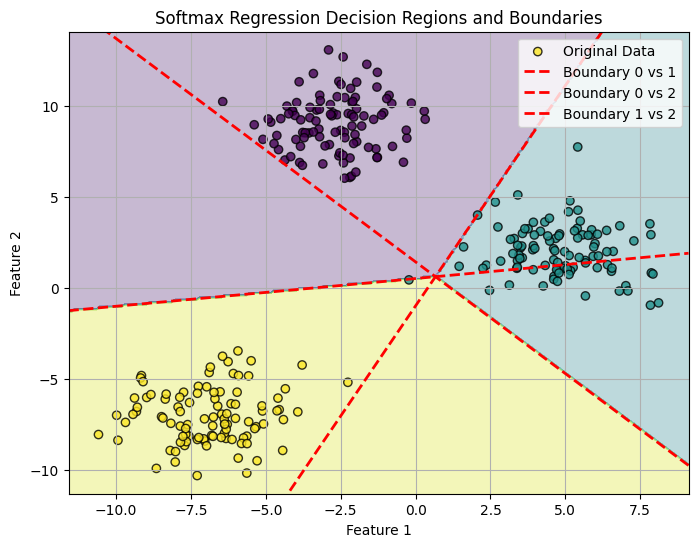

In [44]:
import matplotlib.pyplot as plt

def softmax(theta, X):
    # subtract constant to avoid overflow, same result
    comb = X @ theta
    exp = np.exp(comb - np.max(comb, axis=1, keepdims=True))
    return exp / np.sum(exp, axis=1, keepdims=True)

def softmax_regression(X_train, Y_train, n_class, alpha = 0.001, epoch = 100):
    m = np.shape(X_train)[0]
    # Add bias term
    X_train = np.c_[np.ones((m, 1)), X_train]
    features = np.shape(X_train)[1]

    # Initialize theta [features, n_class]
    theta = np.random.randn(features, n_class) * 0.1

    # Convert Y_train to one-hot encoding
    Y_train_one_hot = np.zeros((m, n_class))
    Y_train_one_hot[np.arange(m), Y_train.flatten()] = 1

    for i in range(epoch):
        Y_pred = softmax(theta, X_train)
        # Gradient calculation
        gradient = (1 / m) * X_train.T @ (Y_pred - Y_train_one_hot)
        theta = theta - alpha * gradient

    return theta

parameter = softmax_regression(X_train, Y_train, n_classes)
print("Learned Parameters (theta):")
print(parameter)

# Define the limits for the plot based on the original data X
limits_X1 = np.array([X[:,0].min(), X[:,0].max()])
limits_X2 = np.array([X[:,1].min(), X[:,1].max()])

# Add some padding to the plot limits for better visualization
padding = 1.0
x1_min, x1_max = limits_X1[0] - padding, limits_X1[1] + padding
x2_min, x2_max = limits_X2[0] - padding, limits_X2[1] + padding

plt.figure(figsize=(8, 6))

# --- 1. Plot Decision Regions using a Meshgrid (recommended for multi-class) ---
# Create a meshgrid to plot decision regions
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                       np.linspace(x2_min, x2_max, 200))

# Flatten meshgrid points and add a bias term (1) for prediction
mesh_points = np.c_[xx1.ravel(), xx2.ravel()]
mesh_points_with_bias = np.c_[np.ones((mesh_points.shape[0], 1)), mesh_points]

# Predict probabilities for each point in the meshgrid using the learned parameters
Y_pred_mesh_probs = softmax(parameter, mesh_points_with_bias)
# Get the predicted class (index of max probability) for each point
Z = np.argmax(Y_pred_mesh_probs, axis=1).reshape(xx1.shape)

# Plot the decision regions using contourf
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='viridis')

# --- 2. Plot Original Data Points ---
plt.scatter(X[:,0], X[:,1], c=Y.flatten(), cmap='viridis', alpha=0.8, edgecolors='k', label='Original Data')

# --- 3. Plot Decision Boundaries (Lines) between each pair of classes ---
# Helper function to find the line segment within plot bounds for a line Ax + By + C = 0
def get_line_segment_in_bounds(A, B, C, x_lim, y_lim):
    points = []

    # Intersect with x = x_min
    if B != 0:
        y_intersect = (-C - A * x_lim[0]) / B
        if y_lim[0] <= y_intersect <= y_lim[1]:
            points.append((x_lim[0], y_intersect))
    # Intersect with x = x_max
    if B != 0:
        y_intersect = (-C - A * x_lim[1]) / B
        if y_lim[0] <= y_intersect <= y_lim[1]:
            points.append((x_lim[1], y_intersect))

    # Intersect with y = y_min
    if A != 0:
        x_intersect = (-C - B * y_lim[0]) / A
        if x_lim[0] <= x_intersect <= x_lim[1]:
            points.append((x_intersect, y_lim[0]))
    # Intersect with y = y_max
    if A != 0:
        x_intersect = (-C - B * y_lim[1]) / A
        if x_lim[0] <= x_intersect <= x_lim[1]:
            points.append((x_intersect, y_lim[1]))

    # Filter unique points (to handle corners or parallel lines more cleanly)
    unique_points_tuples = list(set(points))
    if len(unique_points_tuples) == 2:
        return unique_points_tuples
    return None # No valid segment found

# Iterate through all unique pairs of classes to find their decision boundaries
for i in range(n_classes):
    for j in range(i + 1, n_classes): # Loop only for unique pairs (i, j) where i < j
        # The decision boundary between class i and class j is given by:
        # (theta_i - theta_j)^T * X = 0
        # Let delta_theta = theta_i - theta_j
        # delta_theta[0] + delta_theta[1]*x1 + delta_theta[2]*x2 = 0
        delta_theta = parameter[:, i] - parameter[:, j] # delta_theta is a (features+1,) vector

        # Coefficients for the line equation A*x1 + B*x2 + C = 0
        C = delta_theta[0] # Intercept (bias)
        A = delta_theta[1] # Coefficient for X1
        B = delta_theta[2] # Coefficient for X2

        # Get the line segment within the plot bounds
        segment_points = get_line_segment_in_bounds(A, B, C, (x1_min, x1_max), (x2_min, x2_max))

        if segment_points:
            x_vals = [p[0] for p in segment_points]
            y_vals = [p[1] for p in segment_points]
            plt.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=2,
                     label=f'Boundary {i} vs {j}')

plt.title('Softmax Regression Decision Regions and Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend()
plt.grid(True)
plt.show()